My solutions for Homework3 in IE7275 Data Mining in Engineering

# **Problem 1**

The file twitter.xlsx contains the output from a text classification model. The model was built to control fake news diffuse by classifying whether a tweet about a specific disaster is real or fake. In this case, the fake tweet is the class of interest.

In [ ]:
# Import modules
import pandas as pd
from google.colab import files
from sklearn import metrics
import numpy as np

In [ ]:
# Load the datasets
file = files.upload()
df_1 = pd.read_excel('twitter.xlsx')
df_1.head()

Saving twitter.xlsx to twitter.xlsx


,Tweet,Probability of Fake(F) from the Model,Actual Class
0,1,0.48,R
1,2,0.62,R
2,3,0.75,F
3,4,0.34,R
4,5,0.19,R


### a. Calculate the sensitivity and specificity with 0, 0.2, 0.4, 0.6, 0.8 and 1 as decision threshold probability (cutoff value) respectfully. Plot the result and use the plot to recommend the optimal cutoff value to balance sensitivity and specificity.

In [ ]:
# Explore the dataset
print(df_1.shape)
print(df_1.columns)
print(df_1['Actual Class'].value_counts())

# Copy the dataframe
df_1a = df_1.copy()
df_1b = df_1.copy()

(34, 3)
Index(['Tweet', 'Probability of Fake(F) from the Model', 'Actual Class'], dtype='object')
R    20
F    14
Name: Actual Class, dtype: int64


In [ ]:
thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1]
specificities = []
sensitivities = []

for t in thresholds:
  df_1a['Prediction_binary'] = ["F" if p >= t else "R" for p in df_1a['Probability of Fake(F) from the Model']]

  tn, fp, fn, tp = metrics.confusion_matrix(y_true=df_1a['Actual Class'], y_pred = df_1a['Prediction_binary']).ravel()

  specificities.append(round(tp / (tp + fn), 2))
  sensitivities.append(round(tn / (tn + fp), 2))

  #print(metrics.classification_report(df_1a['Actual Class'], df_1a['Prediction_binary']))
  # Recall - R: specificity
  # Recall - F: sensitivity
  # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

results_1a = pd.DataFrame({"Specificity": specificities, "Sensitivity": sensitivities}, index=thresholds)
results_1a

,Specificity,Sensitivity
0.0,0.00,1.00
0.2,0.35,1.00
0.4,0.55,1.00
0.6,0.75,0.93
0.8,0.90,0.57
1.0,1.00,0.00


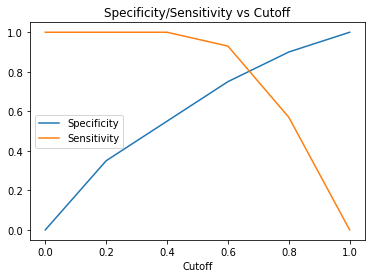

In [ ]:
# Plot the results
_ = results_1a.plot.line(title='Specificity/Sensitivity vs Cutoff', xlabel="Cutoff")

In the plot above, the optimal cutoff is at the intersection of two lines, which is around 0.65. Therefore, the recommended cutoff is 0.6, which is the closest to 0.65 among the given cutoffs.

### b. Calculate the Matthews correlation coefficient (MCC) with a default threshold of 0.5 and the optimal cutoff from the above question. Discuss your findings.

In [ ]:
thresholds = [0.5, 0.6]

for t in thresholds:
  df_1b['Prediction_binary'] = ["F" if p >= t else "R" for p in df_1b['Probability of Fake(F) from the Model']]

  tn, fp, fn, tp = metrics.confusion_matrix(y_true=df_1b['Actual Class'], y_pred = df_1b['Prediction_binary']).ravel()

  print("--- Threshold: " + str(t) + " ---")  
  MCC = (tn*tp - fn*fp)/(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
  print("MCC: " + str(round(MCC, 4)))
  
  # sklearn fucntion
  #print("MCC by scikit-learn: " + str(metrics.matthews_corrcoef(df_1b['Actual Class'], df_1b['Prediction_binary'])))

--- Threshold: 0.5 ---
MCC: 0.7
--- Threshold: 0.6 ---
MCC: 0.6691


If we take a look only at the MCC shown above, the threshold 0.5 seems to provide better prediction than the threshold 0.6. However, since this is only one of the model performance measures, it is important to look at other measures such as sensitivity and specificity and decide which measures should be prioritized more, based on the business requirements or the problems the model is addressing.

# **Problem 2**

Machine learning specialists have built a whale recognition model that allows marine biologists to identify individual whales from aerial photographs. The model was trained on 20000 images, which contains 8000 whale images and 12000 other images. The model classified 7790 whale images and 11700 other images correctly. On the validation set of 2000 images (750 whale images and 1250 other images), the model classified 500 whale images and 995 other images correctly.

In [ ]:
# Import modules
import pandas as pd
from google.colab import files
from sklearn import metrics
import numpy as np

### a. Build confusion matrixes for training and validation set, respectively. Calculate error rate, sensitivity, and specificity for each.


Manually build confusion matrixes and calculate error rate, sensitivity, and specificity

Training dataset:

            Predited
    Actual Whale Other
    Whale  7790  210
    Other  300   11700

    * True Negative = 8000 - 7790 = 210
    * False Positive = 12000 - 11700 = 300
    
    Error rate = (300 + 210) / 20000 = 0.0255
    Sensitivity = 7790 / (7790 + 210) = 0.974
    Specificity = 11700 / (11700 + 300) = 0.975


Validation dataset:

            Predited
    Actual Whale Other
    Whale  500   250
    Other  255   995

    * True Negative = 750 - 500 = 250
    * False Positive = 1250 - 995 = 255

    Error rate = (255 + 250) / 2000 = 0.2525
    Sensitivity = 500 / (500 + 250) = 0.667
    Specificity = 995 / (995 + 255) = 0.796

### b. Comment on the model performance.

Looking at the results above, since the Error rate is higher and both Sensitivity and Specificity are lower on the validation dataset, the model is performing worse on the validation dataset than on the training dataset.

# **Problem 3**
The data science team in a genetic testing company has developed a predictive model to identify Type 1 Gaucher disease. From domain knowledge, the prevalence of Type 1 Gaucher disease in the US population is 4%. The model was built on a dataset of 4000 samples, of which 1800 samples were diagnosed as positive. The team partitioned the dataset into 70% training and 30% validation with a stratified sampling technique. The sensitivity and specificity achieved on the validation set are 70% and 90%, respectively.

### a. Calculate the adjusted misclassification rate, precision, and recall on the validation set. Comment on the model performance.

Since the stratified sampling was used, the validation dataset also has the same ratio of diagnosis results (Positive:Negative = 1800:2200(4000-1800) = 9:11) as the entire samples.

Thus, the valalidation dataset (4000 x 0.3 = 1200 observations) has 540 postives (1200 x 9/20) and 660 negatives (1200 x 11/20).

Since the sensitivity is calculated by "TP/(TP + FN)",

    TP/540 = 0.7
        TP = 378

The spesitivity is calculated by "TN/(TN + FP)",

    TN/660 = 0.9
        TN = 594

Thus,

    FN = 540 - 378
       = 162
    FP = 660 - 594
       = 66

\* TP: True Positive, FN: False Negative, FP: False Negative, TN: True Negative

From the results above, I can build a confusion matrix for the validation dataset as below:

              Predited
    Actual   Positive Negative
    Positive 378      162
    Negative 66       594

Correlation factor for Positive class = f1 = (1800/4000 x 100) / 4 = 11.25

Correlation factor for Negative class = f2 = (2200/4000 x 100) / 96 = 0.573

From the results above, the Reweighted Confusion(Classification) Matrix can build as:

              Predited
    Actual   Positive           Negative
    Positive 33.6(=378/11.25)   14.4(=162/11.25)
    Negative 115.18(=66/0.573)  1036.65(=594/0.573)


Therefore, Adjusted misclassification rate: (14.4 + 115.18) / 1200 = 0.108

Precision from the reweighted confusion matrix: 33.6 / (33.6 + 115.18) = 0.226

Recall from the reweighted confusion matrix: 33.6 / (33.6 + 14.4) = 0.7

Comment:

Looking at the results above, since the Precision is low at 0.226, this model is not good at correctly predicting Positives. If patients are diagnosed based on this model, way more patients are diagnosed as Positive than those who actually have the disease, and those patients unnecesarily need to go through the treatments.

### b. Recommend another scheme to deal with the unbalanced data for this data science team.

We can recommend this team to obtain non-oversampled data and evaluate the model performance on this non-oversampled data rather than evaluating on their current oversampled data. They can train models using their current oversampled data, but it is recommended to evaluate models on regular, non-oversampled data.


Reference:
- P.201 in the Textbook "Data-Mining-for-Business-Analytics-Concepts-Techniques-and-Applications-in-Python"

# **Problem 4**
Coursera released a new data mining online seminar. To increase the purchase rate, the marketing team decided to feed the users customized advertisements. The customized ad will cost the company \$2 per user. The registration fee for the seminar is \$30. For example, the profit for Coursera will be \$28 if a user sees the customized ad and purchases the seminar. If a user sees the customized ad but doesn’t purchase it, Coursera will lose \$2. The marketing team then sought help from the data science team to maximize the profit.


The data science team built a predictive model to classify a user as a potential purchaser or non-potential purchaser based on its enrolling history and profile information. The file coursera.xlsx contains the model output on the validation set. Note that 1 indicates the case of the registration to the seminar.

In [ ]:
!pip install dmba

     |████████████████████████████████| 11.8 MB 4.5 MB/s 


In [ ]:
# Import modules
import pandas as pd
from google.colab import files
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from dmba import liftChart

no display found. Using non-interactive Agg backend


In [ ]:
# Load the datasets
file = files.upload()
df_4 = pd.read_excel('coursera.xlsx')
df_4.head()

Saving coursera.xlsx to coursera.xlsx


,User,Probability of Registration (1),Actual Class
0,1,0.50,1
1,2,0.54,0
2,3,0.81,1
3,4,0.46,1
4,5,0.81,1


### a. Build a lift chart of net profit using the validation result.

In [ ]:
# Sort by Probability of Registration
df_4 = df_4.sort_values("Probability of Registration (1)", ascending=False)
df_4

,User,Probability of Registration (1),Actual Class
29,30,0.98,1
26,27,0.94,1
17,18,0.94,1
7,8,0.91,0
30,31,0.90,1
15,16,0.89,0
12,13,0.87,1
20,21,0.86,1
6,7,0.86,1
32,33,0.86,1


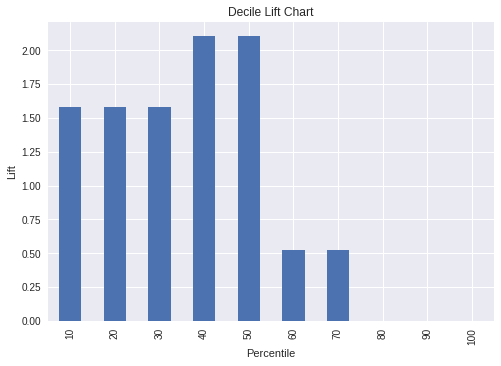

In [ ]:
liftChart(df_4["Actual Class"], labelBars=False)
plt.show()

# Reference:
# P.189, 193 in the Textbook "Data-Mining-for-Business-Analytics-Concepts-Techniques-and-Applications-in-Python"

### b. Assume eight seats are remaining in the seminar. Based on the validation result, which eight users should the marketing team feed the advertisement to? How much profit will Coursera gain from these targeted users? And what is the lift of profit comparing to the baseline?

As it can be seen in the Decile Lift Chart above, the highest lift is observed at 4th and 5th deciles. Since there are 40 observations (users) in the dataset, each decile contains 4 users (40/10 = 4), and 8 users in the 4th and 5th deciles should be the ones the marketing team should feed the advertisement to. (List of these 8 users are shown below.)

Since all of these selected 8 users will register for the semiter, the profit will be \$224 (= \$28 x 8).

The lift for the 4th and 5th deciles are around 2.00.

List of 8 users mentioned above:

In [ ]:
# The dataframe is already sorted by Probability of Registration in decending order
df_4[12:20]

,User,Probability of Registration (1),Actual Class
4,5,0.81,1
36,37,0.78,1
18,19,0.76,1
39,40,0.75,1
19,20,0.70,1
37,38,0.70,1
27,28,0.67,1
24,25,0.66,1
